In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/AFRL-Intern-Project-Data-Poisoning-Attacks-Using-DP-SGD')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [ ]:


from models.cnn import ConvolutionalNeuralNetwork
from utils.trainingFunction import trainingFunction
from utils.label_flipping_attack import apply_label_flipping

In [ ]:
transform = transforms.ToTensor() #converting MNIST Image into tensor of 4 dimensions(image, height, wdith, color channel)
#Train Data
trainData = datasets.MNIST(root ='/cnn_data', train = True, download = True, transform = transform)
trainData = apply_label_flipping(trainData, flip_rate=0.1) #In the training data we include label flipping attack
#Test Data
testData = datasets.MNIST(root = '/cnn_data', train = False, download = True, transform = transform)

trainLoader = DataLoader(trainData, batch_size=10, shuffle = True)
testLoader = DataLoader(testData, batch_size=10, shuffle = False)

torch.manual_seed(41)
model = ConvolutionalNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) #Smaller the learning rate the longer is gonna take to train
epochs = 15

train_loss, test_loss, train_correct, test_correct = trainingFunction(
    model, trainLoader, testLoader, epochs, criterion, optimizer
)


Epoch: 1, Batch 600, Loss  2.2999
Epoch: 1, Batch 1200, Loss  2.2822
Epoch: 1, Batch 1800, Loss  2.2861
Epoch: 1, Batch 2400, Loss  2.2984
Epoch: 1, Batch 3000, Loss  2.2872
Epoch: 1, Batch 3600, Loss  2.2984
Epoch: 1, Batch 4200, Loss  2.2995
Epoch: 1, Batch 4800, Loss  2.2980
Epoch: 1, Batch 5400, Loss  2.2825
Epoch: 1, Batch 6000, Loss  2.2884
Epoch 1 — Train Accuracy: 16.46%
Epoch 1 — Test Accuracy: 29.16%
Epoch: 2, Batch 600, Loss  2.2532
Epoch: 2, Batch 1200, Loss  2.2683
Epoch: 2, Batch 1800, Loss  2.2607
Epoch: 2, Batch 2400, Loss  2.2675
Epoch: 2, Batch 3000, Loss  2.2079
Epoch: 2, Batch 3600, Loss  2.1391
Epoch: 2, Batch 4200, Loss  1.9421
Epoch: 2, Batch 4800, Loss  1.7098
Epoch: 2, Batch 5400, Loss  1.3972
Epoch: 2, Batch 6000, Loss  1.6465
Epoch 2 — Train Accuracy: 42.15%
Epoch 2 — Test Accuracy: 65.62%
Epoch: 3, Batch 600, Loss  1.0722
Epoch: 3, Batch 1200, Loss  1.0055
Epoch: 3, Batch 1800, Loss  0.7220
Epoch: 3, Batch 2400, Loss  0.7963
Epoch: 3, Batch 3000, Loss  1.407

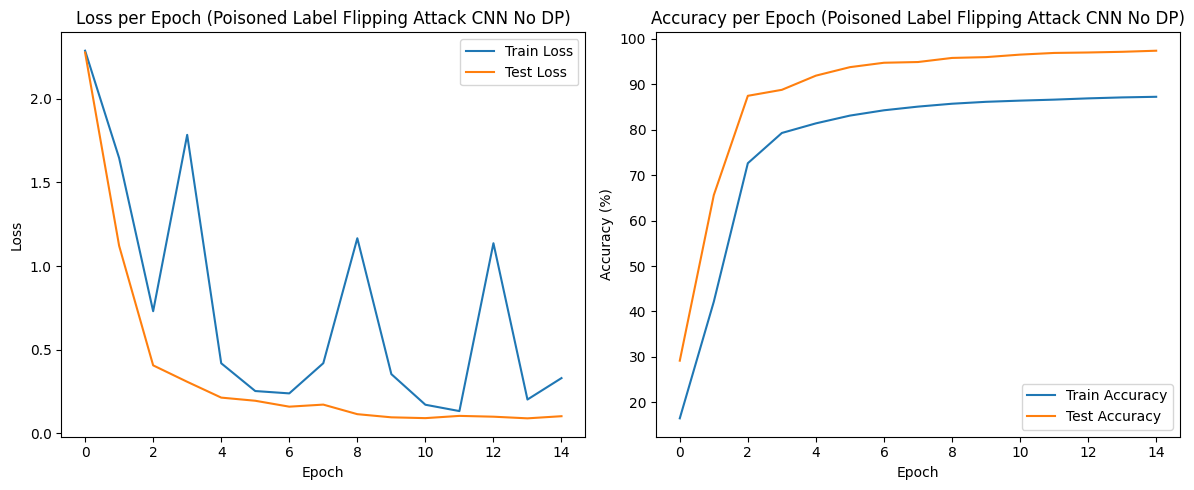

In [ ]:
def compute_accuracy(correct_list, total_samples):
    return [100 * (x / total_samples) for x in correct_list]

train_acc = compute_accuracy(train_correct, len(trainLoader.dataset))
test_acc = compute_accuracy(test_correct, len(testLoader.dataset))

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss per Epoch (Poisoned Label Flipping Attack CNN No DP)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title('Accuracy per Epoch (Poisoned Label Flipping Attack CNN No DP)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()
